## <center>HUMAN ACTIVITY RECOGNITION USING SMARTPHONE DATA</center>

### Table of Contents

1. Importing necessary libraries
2. Loading Data
3. Data preprocessing
    * 3.a Checking for Duplicates
    * 3.b Checking for missing values
    * 3.c Checking for class imbalance
4. Exploratory Data Analysis
    * 4.a Analysing tbodyAccMag-mean feature
    * 4.b Analysing Angle between Y-axis and gravityMean feature
    * 4.c Analysing Angle between Y-axis and gravityMean feature
    * 4.d Visualising data using t-SNE
5. Model Prediction and Evaluation 
    * 5.a Logistic Regression model with Hyperparameter tuning and cross validation
    * 5.b Linear SVM model with Hyperparameter tuning and cross validation
    * 5.c Kernel SVM model with Hyperparameter tuning and cross validation
    * 5.d Decision tree model with Hyperparameter tuning and cross validation
    * 5.e Random Forest model with Hyperparameter tuning and cross validation

### 1. Importing the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 


### 2. Loading the Data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

### 3. Data Preprocessing

##### 3.a Checking of duplicates

In [7]:
print('Number of duplicates in train:' , sum(train.duplicated())) 
print('Number of duplicates in test:' , sum(test.duplicated())) 

Number of duplicates in train: 0
Number of duplicates in test: 0


##### 3.b Checking for missing values

In [10]:
print('Total number of missing values in train:' , train.isna().values.sum()) 
print('Total number of missing values in test:' , test.isna().values.sum()) 

Total number of missing values in train: 0
Total number of missing values in test: 0


##### 3.c Checking for class imbalance

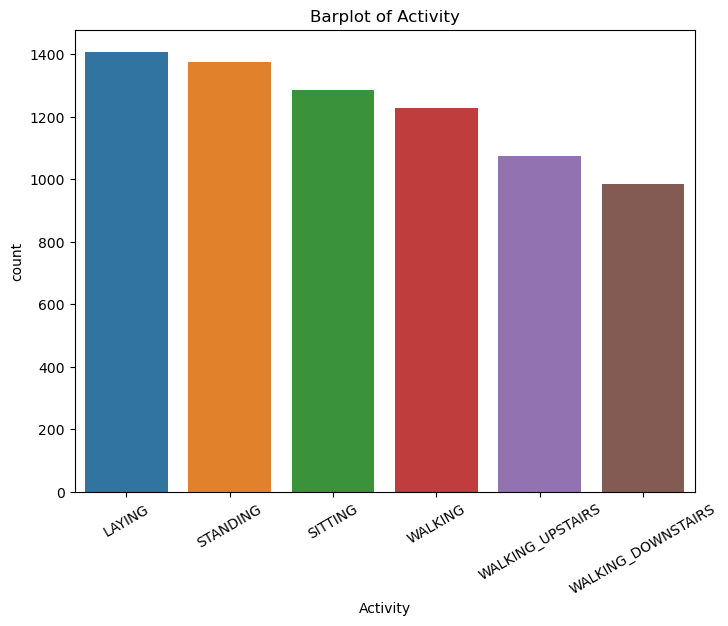

In [12]:
plt.figure(figsize = (8,6))
plt.title('Barplot of Activity')
sns.countplot(train.Activity, order = train.Activity.value_counts().index)
plt.xticks(rotation = 30)
plt.show()

##### There is almost same number of observations across all the six acivities so this data does not have class imbalance